In [160]:
import random
import numpy
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.optimize as optimize
from decimal import Decimal

### Initializing

In [161]:
alpha = random.uniform(0, 1)    #random value
beta = random.uniform(0, 1)     #random value
size_of_array = 100
min_ab=0
max_ab=1
error =0.001
delta_normal=numpy.random.standard_normal(size=size_of_array)     #random samples samples from a standard Normal distribution (mean=0, stdev=1).   
x=[]   #Intializing the x vector
y=[]   #Intializing the y vector
y_clear =[] #Intializing the clear y vector
for k in range(size_of_array):    #According to the proposed formulas, calculating x and y with noise (y), ckear y without noise
    x.append(k/100)
    y.append(alpha* x[k]+ beta+ delta_normal[k])
    y_clear.append(alpha* x[k]+ beta)
x=numpy.array(x)        #transforming to numpy.array for future uses.
y=numpy.array(y)
y_clear=numpy.array(y_clear)

### Defining Gradient Descent

In [162]:
def gradient_descent(x, y, label, error):
    a, b = 0, 0
    lr = 1e-2
    num_iter = 0
    fun_cal = 0
    while True:
        num_iter += 1
        prev_a, prev_b = a, b
        if label == 'linear':
            a = a - lr * (-2) / len(x) * sum(x * (y - a * x - b))
            b = b - lr * (-2) / len(x) * sum(y - a * x - b)
        elif label == 'rational':
            a = a - lr * (-2/len(x)) * sum((-a + b * x * y + y) / (b*x + 1)**2)
            b = b - lr * (-2)/len(x) * sum(a * x * (a - y * (b*x + 1)) / (b * x + 1) ** 3)
        fun_cal += 1
        if (((a - prev_a) ** 2 + (b - prev_b) ** 2) ** 0.5 < error):
            break

    return a, b, num_iter, fun_cal

### Defining Mean Suquare Error for each approximation

In [163]:
# Mean Suare error with linear approximation
def MLS_linear(params, x,y):
    a, b = params
    return sum((y - (a*x+b))**2)

In [164]:
# Mean Suare error with rational approximation
def MLS_rational(params, x,y):
    a, b = params
    return sum((y - (a/ (1+b*x)))**2)

### Defining linear and rational approximation for the lm method

In [165]:
# linear approximation
def linear(params, x,y):
    a, b = params
    return ((y - (a*x+b))**2)

# rational approximation
def rational(params, x,y):
    a, b = params
    return ((y - (a/ (1+b*x)))**2)

### Applying the four methods

#### Linear Approximation

##### First and Second order methods

In [166]:
parameters_linear=[] # array to save the results

In [167]:
# optimization through the four methods
res_linear_grad_des = gradient_descent(x, y, 'linear', error)
res_linear_conj_grad = optimize.minimize(MLS_linear, [0, 0], args=(x,y), tol=error, method='CG')
res_linear_newton = optimize.minimize(MLS_linear, [0, 0], args=(x,y), tol=error, method='BFGS')
res_linear_lm = optimize.least_squares(linear, [0, 0], args=(x,y), xtol=error, method='lm')

In [168]:
#saving the results of the optimixation for each method in the defined array
parameters_linear.append([res_linear_grad_des[0],res_linear_grad_des[1],0,res_linear_grad_des[3],res_linear_grad_des[2]])
parameters_linear.append([res_linear_conj_grad.x[0],res_linear_conj_grad.x[1],res_linear_conj_grad.fun,res_linear_conj_grad.nfev,res_linear_conj_grad.nit])
parameters_linear.append([res_linear_newton.x[0],res_linear_newton.x[1],res_linear_newton.fun,res_linear_newton.nfev,res_linear_newton.nit])
parameters_linear.append([res_linear_lm.x[0],res_linear_lm.x[1],0,res_linear_lm.nfev,0])

In [169]:
#calculating a,b precision for each method
parameters_linear[0].append(abs(alpha-parameters_linear[0][0]))
parameters_linear[0].append(abs(beta-parameters_linear[0][1]))
parameters_linear[1].append(abs(alpha-parameters_linear[1][0]))
parameters_linear[1].append(abs(beta-parameters_linear[1][1]))
parameters_linear[2].append(abs(alpha-parameters_linear[2][0]))
parameters_linear[2].append(abs(beta-parameters_linear[2][1]))
parameters_linear[3].append(abs(alpha-parameters_linear[3][0]))
parameters_linear[3].append(abs(beta-parameters_linear[3][1]))

##### zero order methods from task 02

In [170]:
# from previous task
res_linear_exhaustive = optimize.brute(MLS_linear, [[0, 1], [0, 1]], args=(x,y), Ns=int(1/error) + 1,full_output=True)
res_linear_gaus = optimize.minimize(MLS_linear, [0, 0], args=(x,y), tol=error, method='Powell')
res_linear_nm = optimize.minimize(MLS_linear, [0, 0], args=(x,y), tol=error, method='Nelder-Mead')
parameters_linear.append([res_linear_exhaustive[0][0],res_linear_exhaustive[0][1],res_linear_exhaustive[1],0,0])
parameters_linear.append([res_linear_gaus.x[0],res_linear_gaus.x[1],res_linear_gaus.fun,res_linear_gaus.nfev,res_linear_gaus.nit])
parameters_linear.append([res_linear_nm.x[0],res_linear_nm.x[1],res_linear_nm.fun,res_linear_nm.nfev,res_linear_nm.nit])
parameters_linear[4].append(abs(alpha-parameters_linear[4][0]))
parameters_linear[4].append(abs(beta-parameters_linear[4][1]))
parameters_linear[5].append(abs(alpha-parameters_linear[5][0]))
parameters_linear[5].append(abs(beta-parameters_linear[5][1]))
parameters_linear[6].append(abs(alpha-parameters_linear[6][0]))
parameters_linear[6].append(abs(beta-parameters_linear[6][1]))

##### Printing the results

In [171]:
# Printing a table with results
rowIDs=[ 'Gradient Descent','Non-linear CGD','Newton’s ','Levenberg-Marquardt ','Exhaustive','Gauss ','Nelder-Mead']
print(tabulate(parameters_linear, headers=['a','b','function value','function claculation','num of iteration','precesion |a-alpha|','precesion |b-beta|'],numalign ='center',showindex=rowIDs))

                        a         b       function value    function claculation    num of iteration    precesion |a-alpha|    precesion |b-beta|
-------------------  --------  --------  ----------------  ----------------------  ------------------  ---------------------  --------------------
Gradient Descent     0.454947  0.688058         0                   129                   129                0.240954              0.0168819
Non-linear CGD       0.838802  0.520965      71.5957                 15                    2                 0.142902               0.150211
Newton’s             0.838802  0.520965      71.5957                 18                    4                 0.142902               0.150211
Levenberg-Marquardt  1.12527   0.387681         0                    40                    0                 0.429368               0.283495
Exhaustive           0.838842  0.520928      71.5957                 0                     0                 0.142942               0.150249
Ga

##### Visualizing zero, first and second order methods.

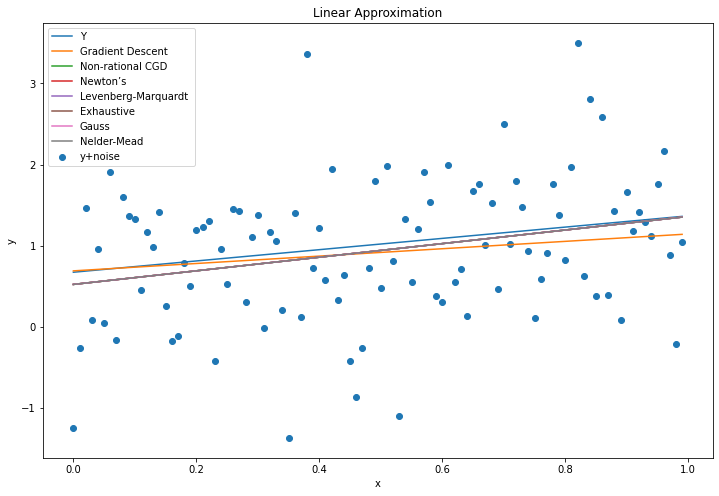

In [172]:
#ploting original y data (with no nise), y data with noise, and each of the three optimization methods
plt.figure(figsize=(12, 8))
plt.plot(x, y_clear)
plt.plot(x, numpy.array(res_linear_grad_des[0]*x+res_linear_grad_des[1]))
plt.plot(x, numpy.array(res_linear_conj_grad.x[0]*x+res_linear_conj_grad.x[1]))
plt.plot(x, numpy.array(res_linear_newton.x[0]*x+res_linear_newton.x[1]))
plt.plot(x, numpy.array(res_linear_newton.x[0]*x+res_linear_newton.x[1]))
plt.plot(x, numpy.array(res_linear_exhaustive[0][0]*x+res_linear_exhaustive[0][1]))
plt.plot(x, numpy.array(res_linear_gaus.x[0]*x+res_linear_gaus.x[1]))
plt.plot(x, numpy.array(res_linear_nm.x[0]*x+res_linear_nm.x[1]))
plt.scatter(x, y)
plt.legend(['Y','Gradient Descent','Non-rational CGD','Newton’s ','Levenberg-Marquardt ',"Exhaustive", "Gauss","Nelder-Mead",'y+noise'] ) 
plt.title("Linear Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##### Visualizing first and second order methods.

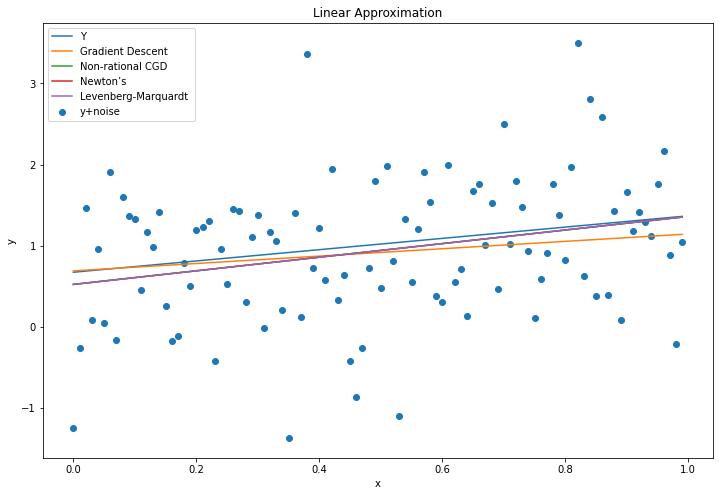

In [173]:
#ploting original y data (with no nise), y data with noise, and each of the three optimization methods
plt.figure(figsize=(12, 8))
plt.plot(x, y_clear)
plt.plot(x, numpy.array(res_linear_grad_des[0]*x+res_linear_grad_des[1]))
plt.plot(x, numpy.array(res_linear_conj_grad.x[0]*x+res_linear_conj_grad.x[1]))
plt.plot(x, numpy.array(res_linear_newton.x[0]*x+res_linear_newton.x[1]))
plt.plot(x, numpy.array(res_linear_newton.x[0]*x+res_linear_newton.x[1]))
plt.scatter(x, y)
plt.legend(['Y','Gradient Descent','Non-rational CGD','Newton’s ','Levenberg-Marquardt ','y+noise'] ) 
plt.title("Linear Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##### Visualizing zero order methods.

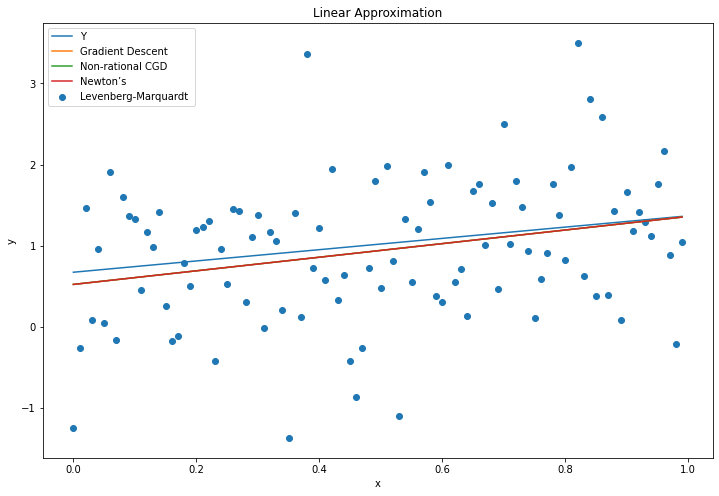

In [174]:
#ploting original y data (with no nise), y data with noise, and each of the three optimization methods
plt.figure(figsize=(12, 8))
plt.plot(x, y_clear)
plt.plot(x, numpy.array(res_linear_exhaustive[0][0]*x+res_linear_exhaustive[0][1]))
plt.plot(x, numpy.array(res_linear_gaus.x[0]*x+res_linear_gaus.x[1]))
plt.plot(x, numpy.array(res_linear_nm.x[0]*x+res_linear_nm.x[1]))
plt.scatter(x, y)
plt.legend(['Y','Gradient Descent','Non-rational CGD','Newton’s ','Levenberg-Marquardt ',"Exhaustive", "Gauss","Nelder-Mead",'y+noise'] ) 
plt.title("Linear Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Rational approximation

##### First and Second order methods

In [175]:
parameters_rational=[] # array to save the results

In [176]:
# optimization through the four methods
res_rational_grad_des = gradient_descent(x, y, 'rational', error)
res_rational_conj_grad = optimize.minimize(MLS_rational, [0, 0], args=(x,y), tol=error, method='CG')
res_rational_newton = optimize.minimize(MLS_rational, [0, 0], args=(x,y), tol=error, method='BFGS')
res_rational_lm = optimize.least_squares(rational, [0, 0], args=(x,y), xtol=error, method='lm')

In [177]:
#saving the results of the optimixation for each method in the defined array
parameters_rational.append([res_rational_grad_des[0],res_rational_grad_des[1],0,res_rational_grad_des[3],res_rational_grad_des[2]])
parameters_rational.append([res_rational_conj_grad.x[0],res_rational_conj_grad.x[1],res_rational_conj_grad.fun,res_rational_conj_grad.nfev,res_rational_conj_grad.nit])
parameters_rational.append([res_rational_newton.x[0],res_rational_newton.x[1],res_rational_newton.fun,res_rational_newton.nfev,res_rational_newton.nit])
parameters_rational.append([res_rational_lm.x[0],res_rational_lm.x[1],0,res_rational_lm.nfev,0])

In [178]:
#calculating a,b precision for each method
parameters_rational[0].append(abs(alpha-parameters_rational[0][0]))
parameters_rational[0].append(abs(beta-parameters_rational[0][1]))
parameters_rational[1].append(abs(alpha-parameters_rational[1][0]))
parameters_rational[1].append(abs(beta-parameters_rational[1][1]))
parameters_rational[2].append(abs(alpha-parameters_rational[2][0]))
parameters_rational[2].append(abs(beta-parameters_rational[2][1]))
parameters_rational[3].append(abs(alpha-parameters_rational[3][0]))
parameters_rational[3].append(abs(beta-parameters_rational[3][1]))

##### zero order methods from task 02

In [179]:
# from previous task
# optimization through the three methods
res_rational_exhaustive = optimize.brute(MLS_rational, [[0, 1], [0, 1]], args=(x,y), Ns=int(1/error) + 1,full_output=True)
res_rational_gaus = optimize.minimize(MLS_rational, [0, 0], args=(x,y), tol=error, method='Powell')
res_rational_nm = optimize.minimize(MLS_rational, [0, 0], args=(x,y), tol=error, method='Nelder-Mead')
parameters_rational.append([res_rational_exhaustive[0][0],res_rational_exhaustive[0][1],res_rational_exhaustive[1],0,0])
parameters_rational.append([res_rational_gaus.x[0],res_rational_gaus.x[1],res_rational_gaus.fun,res_rational_gaus.nfev,res_rational_gaus.nit])
parameters_rational.append([res_rational_nm.x[0],res_rational_nm.x[1],res_rational_nm.fun,res_rational_nm.nfev,res_rational_nm.nit])
#calculating a,b precision for each method
parameters_rational[4].append(abs(alpha-parameters_rational[4][0]))
parameters_rational[4].append(abs(beta-parameters_rational[4][1]))
parameters_rational[5].append(abs(alpha-parameters_rational[5][0]))
parameters_rational[5].append(abs(beta-parameters_rational[5][1]))
parameters_rational[6].append(abs(alpha-parameters_rational[6][0]))
parameters_rational[6].append(abs(beta-parameters_rational[6][1]))

##### Printing the results

In [180]:
# Printing a table with results
rowIDs=['Gradient Descent','Non-rational CGD','Newton’s ','Levenberg-Marquardt ','Exhaustive','Gauss ','Nelder-Mead'] # 'Gradient Descent'
print(tabulate(parameters_rational, headers=['a','b','function value','function claculation','num of iteration','precesion |a-alpha|','precesion |b-beta|'],numalign ='center',showindex=rowIDs))

                        a          b       function value    function claculation    num of iteration    precesion |a-alpha|    precesion |b-beta|
-------------------  --------  ---------  ----------------  ----------------------  ------------------  ---------------------  --------------------
Gradient Descen      0.799117  -0.317561         0                   157                   157                0.103217               0.988737
Non-rational CGD     0.647256  -0.554394      71.9253                 93                    9                 0.048645               1.22557
Newton’s             0.647257  -0.554394      71.9253                 54                    11                0.0486432              1.22557
Levenberg-Marquardt  0.612487  -0.625442         0                    40                    0                 0.0834133              1.29662
Exhaustive           0.647235  -0.55445       71.9253                 0                     0                 0.0486652              1.22563

##### Visualizing zero, first and second order methods.

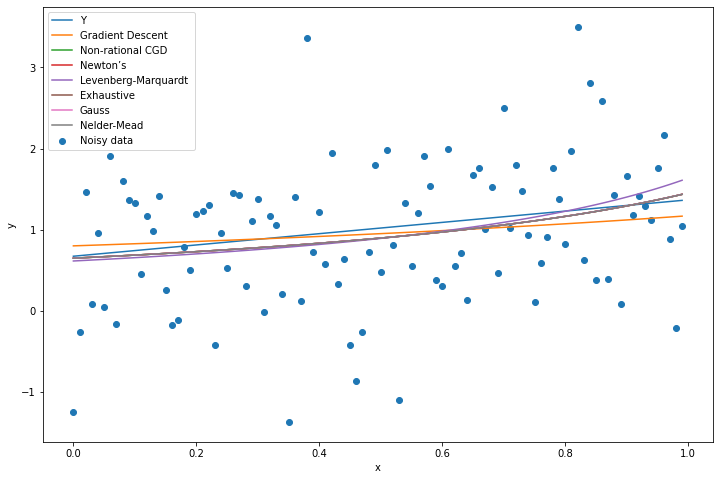

In [181]:
#ploting original y data (with no nise), y data with noise, and each of the three optimization methods
plt.figure(figsize=(12, 8))
plt.plot(x, y_clear)
plt.plot(x, numpy.array(res_rational_grad_des[0]/(1+ x* res_rational_grad_des[1])))
plt.plot(x, numpy.array(res_rational_conj_grad.x[0]/(1+x*res_rational_conj_grad.x[1])))
plt.plot(x, numpy.array(res_rational_newton.x[0]/(1+x*res_rational_newton.x[1])))
plt.plot(x, numpy.array(res_rational_lm.x[0]/(1+x*res_rational_lm.x[1])))
plt.plot(x, numpy.array(res_rational_exhaustive[0][0]/(1+x*res_rational_exhaustive[0][1])))
plt.plot(x, numpy.array(res_rational_gaus.x[0]/(1+x*res_rational_gaus.x[1])))
plt.plot(x, numpy.array(res_rational_nm.x[0]/(1+x*res_rational_nm.x[1])))
plt.scatter(x, y)
plt.legend(['Y','Gradient Descent','Non-rational CGD','Newton’s ','Levenberg-Marquardt ',"Exhaustive", "Gauss","Nelder-Mead","Noisy data",'y+noise'] ) 
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##### Visualizing first and second order methods.

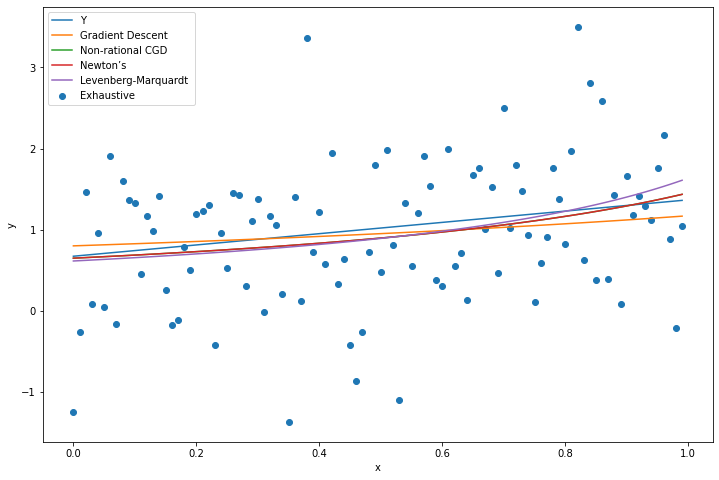

In [182]:
#ploting original y data (with no nise), y data with noise, and each of the three optimization methods
plt.figure(figsize=(12, 8))
plt.plot(x, y_clear)
plt.plot(x, numpy.array(res_rational_grad_des[0]/(1+ x* res_rational_grad_des[1])))
plt.plot(x, numpy.array(res_rational_conj_grad.x[0]/(1+x*res_rational_conj_grad.x[1])))
plt.plot(x, numpy.array(res_rational_newton.x[0]/(1+x*res_rational_newton.x[1])))
plt.plot(x, numpy.array(res_rational_lm.x[0]/(1+x*res_rational_lm.x[1])))
plt.scatter(x, y)
plt.legend(['Y','Gradient Descent','Non-rational CGD','Newton’s ','Levenberg-Marquardt ',"Exhaustive",'y+noise'] ) 
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##### Visualizing zero order methods.

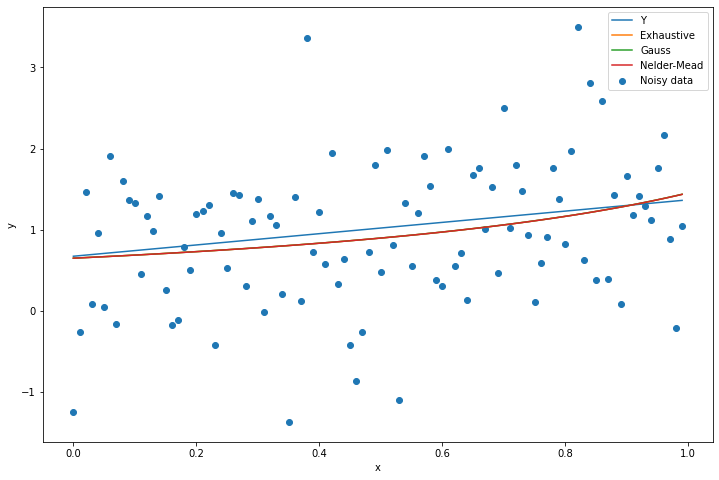

In [183]:
#ploting original y data (with no nise), y data with noise, and each of the three optimization methods
plt.figure(figsize=(12, 8))
plt.plot(x, y_clear)
plt.plot(x, numpy.array(res_rational_exhaustive[0][0]/(1+x*res_rational_exhaustive[0][1])))
plt.plot(x, numpy.array(res_rational_gaus.x[0]/(1+x*res_rational_gaus.x[1])))
plt.plot(x, numpy.array(res_rational_nm.x[0]/(1+x*res_rational_nm.x[1])))
plt.scatter(x, y)
plt.legend(['Y',"Exhaustive", "Gauss","Nelder-Mead","Noisy data",'y+noise'] ) 
plt.xlabel("x")
plt.ylabel("y")
plt.show()